### 데이터 준비
### 모델 선정
### 모델 적합
### 예측
### 성능평가

In [56]:
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### 보스톤 주택 데이터셋 불러오기

In [57]:
from sklearn.datasets import load_boston
boston = load_boston()

In [58]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [62]:
data = boston.data
label = boston.target
columns = boston.feature_names

In [63]:
data = pd.DataFrame(data, columns = columns)
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [8]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [66]:
data["PRICE"] = boston.target
print('data set size : ', data.shape)
data.head(3)

data set size :  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


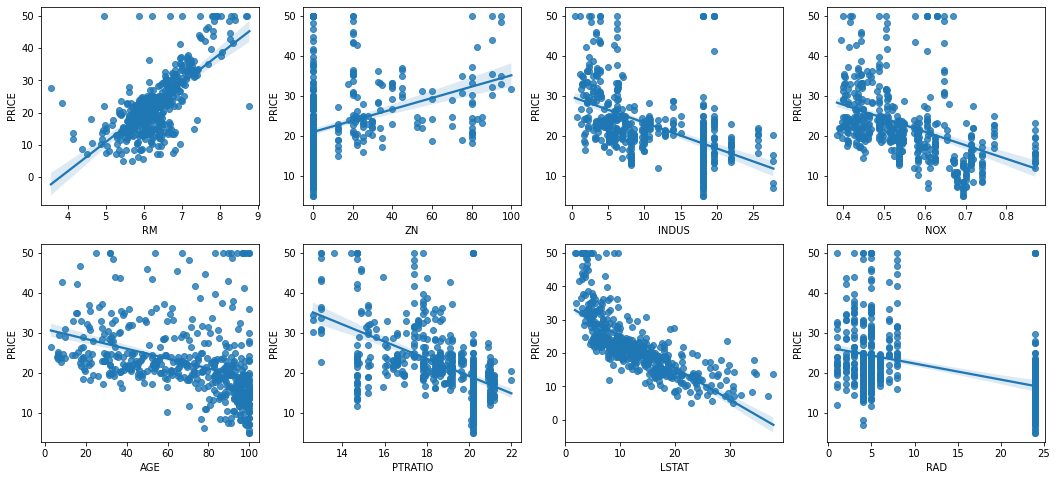

In [67]:
fig, axs = plt.subplots(figsize=(18,8),ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
for i, feature in enumerate(lm_features):
    row = i//4
    col = i%4
    sns.regplot(x=feature, y='PRICE', data=data, ax=axs[row][col])

### 단순 선형회귀

In [25]:
#보스톤 주택 데이터셋 불러오기
from sklearn.datasets import load_boston
boston = load_boston()

In [69]:
data = boston.data    #data
label = boston.target #label
columns = boston.feature_names

In [70]:
data = pd.DataFrame(data, columns = columns)
data.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


### train, test

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2020) 

x_train.shape, x_test.shape

((404, 13), (102, 13))

### 단순선형회귀모델 사용

In [30]:
from sklearn.linear_model import LinearRegression

sim_lr = LinearRegression()

### 학습

In [76]:
sim_lr.fit(x_train['RM'].values.reshape((-1, 1)), y_train)

LinearRegression()

In [77]:
y_pred = sim_lr.predict(x_test['RM'].values.reshape((-1,1)))

In [78]:
y_pred[:8]

array([27.95733816, 22.25345529, 18.84570418, 28.1304592 , 23.62020038,
       20.85026365, 25.11450836, 32.15780142])

In [79]:
y_test[:8]

array([27.5, 20.5,  6.3, 24.8, 23.1, 14.5, 16.5, 15. ])

In [82]:
from sklearn.metrics import mean_squared_error, r2_score

print('R2 : {:.5f}'.format(r2_score(y_test, y_pred)))
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('MSE : {0:.4f}, RMSE : {1:.4f}'.format(mse, rmse))

R2 : 0.39835
MSE : 51.3401, RMSE : 7.1652


### 단순 회귀 모델의 계수 w, 절편 b 살펴보기

In [83]:
print('단순 선형 회귀, 계수(w) : {:.1f}, 절편(b) : {:.4f}'.format(np.round(sim_lr.coef_[0],1), sim_lr.intercept_))

단순 선형 회귀, 계수(w) : 9.1, 절편(b) : -34.4756


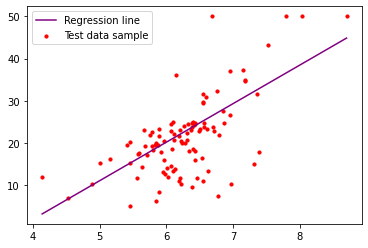

In [86]:
line_x = np.linspace(np.min(x_test['RM']), np.max(x_test['RM']), 10) 
line_y = sim_lr.predict(line_x.reshape((-1, 1)))

plt.scatter(x_test['RM'], y_test, s=10, c='RED')
plt.plot(line_x, line_y, c = 'PURPLE')
plt.legend(['Regression line', 'Test data sample'], loc='upper left')
plt.show()

### 다중 선형회귀

In [41]:
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [42]:
from sklearn.datasets import load_boston
boston = load_boston()

In [43]:
data = boston.data    #data
label = boston.target #label
columns = boston.feature_names

In [44]:
data = pd.DataFrame(data, columns = columns)
data.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=2020) 

# 크기 확인 
x_train.shape, x_test.shape

((404, 13), (102, 13))

In [46]:
from sklearn.linear_model import LinearRegression

mul_lr = LinearRegression()

In [47]:
mul_lr.fit(x_train, y_train)

LinearRegression()

In [48]:
y_pred = mul_lr.predict(x_test)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

print('보스톤 주택가격 예측 다중선형회귀, R2 : {:.4f}'.format(r2_score(y_test, y_pred)))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))

보스톤 주택가격 예측 다중선형회귀, R2 : 0.7683
MSE : 19.774, RMSE : 4.447


In [50]:
# 회귀 계수와 절편 확인하기 --> 회귀식 
print('다중 선형 회귀(LinearRegression), 계수(w) : {}, 절편(b) : {:.4f}'.format(np.round(mul_lr.coef_,1),  mul_lr.intercept_))

다중 선형 회귀(LinearRegression), 계수(w) : [ -0.1   0.    0.    2.2 -16.9   3.9   0.   -1.4   0.3  -0.   -0.9   0.
  -0.5], 절편(b) : 34.6673


In [89]:
from sklearn.model_selection import cross_val_score
y_target = boston.target
x_data = boston.data
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, x_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
arg_rmse = np.mean(rmse_scores)

print('5-folds / Negative MSE scores : ', np.round(neg_mse_scores,2))
print('5-folds / Negative RMSE scores : ', np.round(rmse_scores,2))
print('5-folds AVERAGE RMSE : ', np.round(arg_rmse))

5-folds / Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5-folds / Negative RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5-folds AVERAGE RMSE :  6.0


In [93]:
from sklearn.model_selection import cross_val_score
y_target = boston.target
x_data = boston.data
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, x_data, y_target, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-1*neg_mse_scores)
arg_rmse = np.mean(rmse_scores)

print('5-folds / Negative MSE scores : ', np.round(neg_mse_scores,2))
print('5-folds / Negative RMSE scores : ', np.round(rmse_scores,2))
print('5-folds AVERAGE RMSE : ', np.round(arg_rmse))

5-folds / Negative MSE scores :  [  -9.29  -14.15  -14.07  -35.21  -31.89  -19.84   -9.95 -168.38  -33.33
  -10.96]
5-folds / Negative RMSE scores :  [ 3.05  3.76  3.75  5.93  5.65  4.45  3.15 12.98  5.77  3.31]
5-folds AVERAGE RMSE :  5.0


In [54]:
import pandas as pd

height = [170, 168, 177, 181 ,172, 171, 169, 175, 174, 178, 170, 167, 177, 182 ,173, 171, 170, 179, 175, 177, 186, 166, 183, 168]
weight = [70, 66, 73, 77, 74, 73, 69, 79, 77, 80, 74, 68, 71, 76, 78, 72, 68, 79, 77, 81, 84, 73, 78, 69]

body = pd.DataFrame(
    {'height': height,
    'weight': weight
    }
)

body.tail()

,height,weight
19,177,81
20,186,84
21,166,73
22,183,78
23,168,69


<AxesSubplot:xlabel='weight', ylabel='height'>

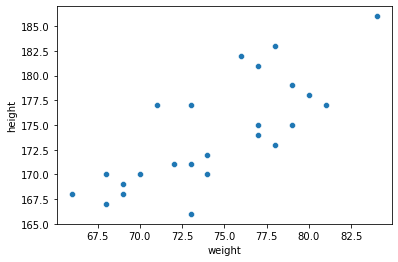

In [55]:
import seaborn as sns
sns.scatterplot(x='weight', y='height', data=body)